## Plotting/Graphing NASA Data Files
Code written by Tony Park during the 2018 NASA Summer Internship at NASA Headquarters<br />
Credits to Kevin Beam for providing the beginning parts of the code

In [12]:
#MAKE A NEW FILE FOR THE NEW DATA

import numpy as np
import re
import matplotlib as mpl
from netCDF4 import Dataset
from math import sqrt
import os
import glob

%matplotlib inline


#Setting dimensions for different types of data (.bin files) (can ignore if you are using .nc4 file)
#temp_clim_shape = (361, 576)
#water_vapor_clim_shape = (361, 576)
#ndvi_clim_shape = (720, 1440)
#iceage_clim_shape = (722, 722)
#nt_clim_shape = (304, 448)

In [13]:
def month_year_from_filename(filename):
    matcher = re.compile('.*(?P<year>\d{4})(?P<month>\d{2}).*\.nc[4]?')
    match = matcher.search(filename)
    if match is not None:
        return (int(match.group('month')), int(match.group('year')))

def get_merra_data(filename, data_key):
    merra_dataset = Dataset(filename, 'r', format='NETCDF4')
    data = merra_dataset.variables[data_key][:]
    lats = merra_dataset.variables['lat'][:]
    lons = merra_dataset.variables['lon'][:]
    merra_dataset.close()

    month, year = month_year_from_filename(filename)

    return {'data': np.flip(data[0], 0),
            'lats': lats,
            'lons': lons,
            'month': month,
            'year': year}


## Functions

In [14]:
#input latitude number on the shown map to convert it to the actual y-axis dimension number of the image
#y-axis
def lat(ycoord):
    return int(360 - (180 + (2*ycoord)))

#input longitude number on the shown map to convert it to the actual x-axis dimension number of the image
#x-axis
def long(xcoord):
    if xcoord == 180:
        xcoord = 179
    return int((288 + (1.6*xcoord)))



#lat1 should be higher value than lat2 (up to down)
#long2 should be higher value than long1 (left to right)
def averageData (name, lat1, lat2, long1, long2):
    total = 0
    counter = 0
    for y in range (lat1, lat2):
        for x in range(long1, long2):
            total = total + name['data'][y,x]
            counter = counter + 1
            
    return total/counter



## Pulling Temperature Data With .nc4 File

284.36945
At the point where the latitude of 45 degrees and longitude of 180 degrees intersects, the temperature is 284.36945 Kelvin.
In the location between the latitudes 0-60 and longitudes -90 to 0, the average temperature is 293.5582201251277 Kelvin.


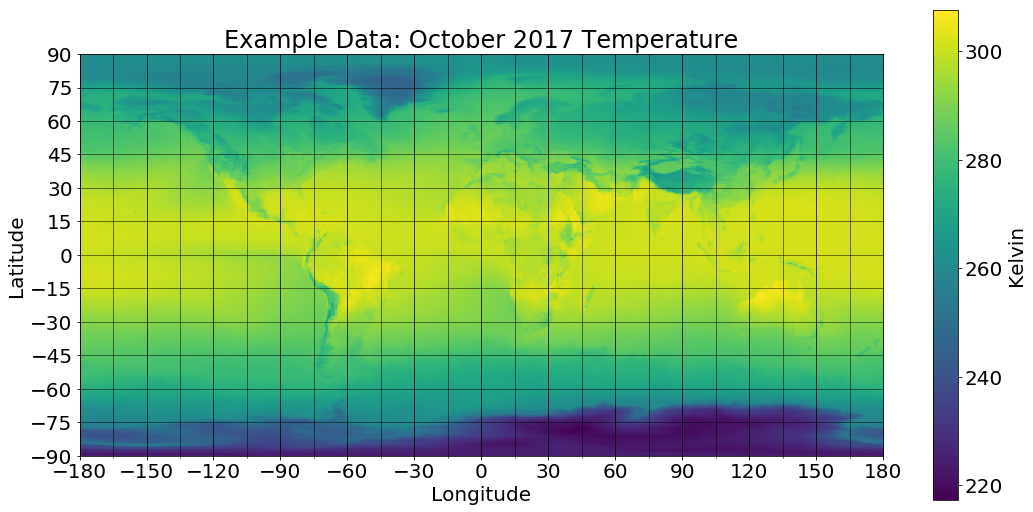

In [23]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.cm as cm
#from mpl_toolkits.basemap import Basemap

#THE PLOT HAS COORDINATES OF (360,575)

t_fn = 'temp_400.tavgM_2d_slv_Nx.201710.SUB.nc4'
tdata = get_merra_data(t_fn, 'T2M') #Use T2M if it's temperature
#tdata now stored the data from the .nc4 file. use tdata to call your data anytime

#setting dimensions of the plot 18 by 9
fig, ax1 = plt.subplots(figsize=(18,9))

#labelling the plot
ax1.set_title("Example Data: October 2017 Temperature")
ax1.set_xlabel("Longitude")
ax1.set_ylabel("Latitude")

#changing font size
plt.rcParams.update({'font.size': 20})

#setting the tick marks on the plot (start point (inclusive), end point (exclusive), interval between each tick)
major_xticks = np.arange(-180,181,30)
#minor ticks are the unlabelled ticks between the major ones
minor_xticks = np.arange(-180,181,15)
#same thing but for y axis ticks
major_yticks = np.arange(-90,91,15)

ax1.set_xticks(major_xticks)
ax1.set_xticks(minor_xticks, minor=True)
ax1.set_yticks(major_yticks)

#creating gridlines. 'k' means color black
ax1.grid(color = 'k', which='both', linewidth = 0.5)

mpl.pyplot.imshow(tdata['data'],extent = [-180, 180, -90, 90])

#creating a colorbar
cbar = mpl.pyplot.colorbar()
cbar.set_label('Kelvin')

#data(latitude, longitude)
#TO PRINT THE TEMPERATURE VALUE OF A SPECIFIC POINT IN THE DATA, FORMAT IT LIKE THIS: 
#print(tdata['data'][lat(your latitude value), long(your longitude value)]

#printing these values gives you the momth/year
month = tdata['month']
year = tdata['year']

print(tdata['data'][lat(45), long(180)])

print("At the point where the latitude of 45 degrees and longitude of 180 degrees intersects, the temperature is " +
      str(tdata['data'][lat(45), long(180)]) + " Kelvin.")

print("In the location between the latitudes 0-60 and longitudes -90 to 0, the average temperature is " +
      str(averageData(tdata, lat(60), lat(0), long(-90), long(0))) + " Kelvin.") 

## Pulling Water Vapor Data with .nc4 File

28.982159
46.90386379145914


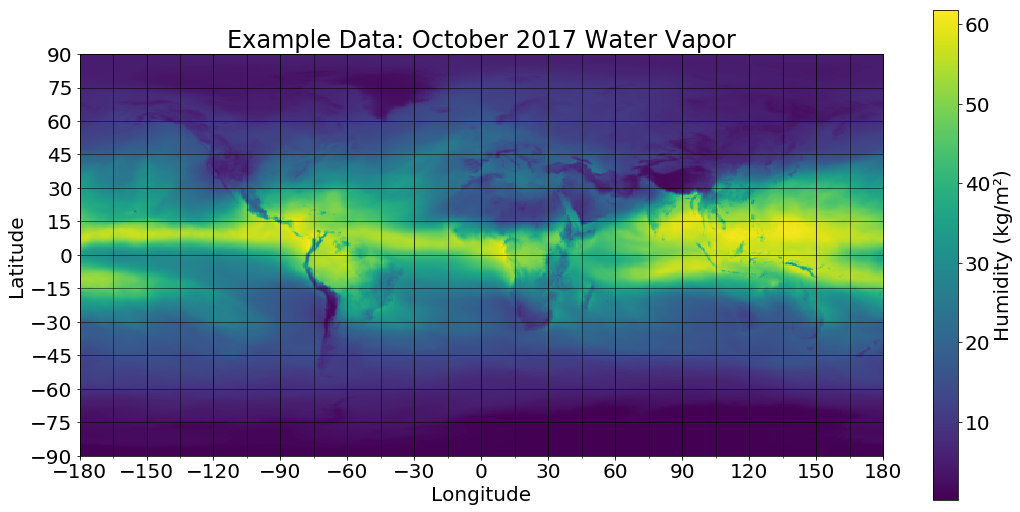

In [16]:
#same concept as the Temperature Data
wv_fn = 'vapor_400.instM_2d_int_Nx.201710.SUB.nc4'
wvdata = get_merra_data(wv_fn, 'TQV') #Use 'TQV' for water vapor

fig, ax2 = plt.subplots(figsize=(18,9))

ax2.set_title("Example Data: October 2017 Water Vapor")
ax2.set_xlabel("Longitude")
ax2.set_ylabel("Latitude")

plt.rcParams.update({'font.size': 20})

major_xticks = np.arange(-180,181,30)
minor_xticks = np.arange(-180,181,15)

major_yticks = np.arange(-90,91,15)

ax2.set_xticks(major_xticks)
ax2.set_xticks(minor_xticks, minor=True)
ax2.set_yticks(major_yticks)

ax2.grid(color = 'k', which='both', linewidth = 0.5)

mpl.pyplot.imshow(wvdata['data'],extent = [-180, 180, -90, 90])

cbar = mpl.pyplot.colorbar()
cbar.set_label('Humidity (kg/m²)')

print(wvdata['data'][lat(-15), long(30)])

print(averageData(wvdata, lat(15), lat(-15), long(-90), long(-60)))

## Getting Data Points for Specific Areas using Functions

In [17]:
#Average Temperature of the Arctic Circle for each month in 2016
#Assume Latitude of 66 to 90 is the arctic region 

t_fn = 'temp_400.tavgM_2d_slv_Nx.201601.SUB.nc4'
tdata = get_merra_data(t_fn, 'T2M')
janTemp16 = averageData(tdata, lat(90), lat(66), long(-180), long(180))

t_fn = 'temp_400.tavgM_2d_slv_Nx.201602.SUB.nc4'
tdata = get_merra_data(t_fn, 'T2M')
febTemp16 = averageData(tdata, lat(90), lat(66), long(-180), long(180))

t_fn = 'temp_400.tavgM_2d_slv_Nx.201603.SUB.nc4'
tdata = get_merra_data(t_fn, 'T2M')
marTemp16 = averageData(tdata, lat(90), lat(66), long(-180), long(180))

t_fn = 'temp_400.tavgM_2d_slv_Nx.201604.SUB.nc4'
tdata = get_merra_data(t_fn, 'T2M')
aprTemp16 = averageData(tdata, lat(90), lat(66), long(-180), long(180))

t_fn = 'temp_400.tavgM_2d_slv_Nx.201605.SUB.nc4'
tdata = get_merra_data(t_fn, 'T2M')
mayTemp16 = averageData(tdata, lat(90), lat(66), long(-180), long(180))

t_fn = 'temp_400.tavgM_2d_slv_Nx.201606.SUB.nc4'
tdata = get_merra_data(t_fn, 'T2M')
junTemp16 = averageData(tdata, lat(90), lat(66), long(-180), long(180))

t_fn = 'temp_400.tavgM_2d_slv_Nx.201607.SUB.nc4'
tdata = get_merra_data(t_fn, 'T2M')
julTemp16 = averageData(tdata, lat(90), lat(66), long(-180), long(180))

t_fn = 'temp_400.tavgM_2d_slv_Nx.201608.SUB.nc4'
tdata = get_merra_data(t_fn, 'T2M')
augTemp16 = averageData(tdata, lat(90), lat(66), long(-180), long(180))

t_fn = 'temp_400.tavgM_2d_slv_Nx.201609.SUB.nc4'
tdata = get_merra_data(t_fn, 'T2M')
sepTemp16 = averageData(tdata, lat(90), lat(66), long(-180), long(180))

t_fn = 'temp_400.tavgM_2d_slv_Nx.201610.SUB.nc4'
tdata = get_merra_data(t_fn, 'T2M')
octTemp16 = averageData(tdata, lat(90), lat(66), long(-180), long(180))

t_fn = 'temp_400.tavgM_2d_slv_Nx.201611.SUB.nc4'
tdata = get_merra_data(t_fn, 'T2M')
novTemp16 = averageData(tdata, lat(90), lat(66), long(-180), long(180))

t_fn = 'temp_400.tavgM_2d_slv_Nx.201612.SUB.nc4'
tdata = get_merra_data(t_fn, 'T2M')
decTemp16 = averageData(tdata, lat(90), lat(66), long(-180), long(180))

In [18]:
#Water Vapor Average in the Arctic Circle

wv_fn = 'vapor_400.instM_2d_int_Nx.201601.SUB.nc4'
wvdata = get_merra_data(wv_fn, 'TQV')
janVapor16 = averageData(wvdata, lat(90), lat(66), long(-180), long(180))

wv_fn = 'vapor_400.instM_2d_int_Nx.201602.SUB.nc4'
wvdata = get_merra_data(wv_fn, 'TQV')
febVapor16 = averageData(wvdata, lat(90), lat(66), long(-180), long(180))

wv_fn = 'vapor_400.instM_2d_int_Nx.201603.SUB.nc4'
wvdata = get_merra_data(wv_fn, 'TQV')
marVapor16 = averageData(wvdata, lat(90), lat(66), long(-180), long(180))

wv_fn = 'vapor_400.instM_2d_int_Nx.201604.SUB.nc4'
wvdata = get_merra_data(wv_fn, 'TQV')
aprVapor16 = averageData(wvdata, lat(90), lat(66), long(-180), long(180))

wv_fn = 'vapor_400.instM_2d_int_Nx.201605.SUB.nc4'
wvdata = get_merra_data(wv_fn, 'TQV')
mayVapor16 = averageData(wvdata, lat(90), lat(66), long(-180), long(180))

wv_fn = 'vapor_400.instM_2d_int_Nx.201606.SUB.nc4'
wvdata = get_merra_data(wv_fn, 'TQV')
junVapor16 = averageData(wvdata, lat(90), lat(66), long(-180), long(180))

wv_fn = 'vapor_400.instM_2d_int_Nx.201607.SUB.nc4'
wvdata = get_merra_data(wv_fn, 'TQV')
julVapor16 = averageData(wvdata, lat(90), lat(66), long(-180), long(180))

wv_fn = 'vapor_400.instM_2d_int_Nx.201608.SUB.nc4'
wvdata = get_merra_data(wv_fn, 'TQV')
augVapor16 = averageData(wvdata, lat(90), lat(66), long(-180), long(180))

wv_fn = 'vapor_400.instM_2d_int_Nx.201609.SUB.nc4'
wvdata = get_merra_data(wv_fn, 'TQV')
sepVapor16 = averageData(wvdata, lat(90), lat(66), long(-180), long(180))

wv_fn = 'vapor_400.instM_2d_int_Nx.201610.SUB.nc4'
wvdata = get_merra_data(wv_fn, 'TQV')
octVapor16 = averageData(wvdata, lat(90), lat(66), long(-180), long(180))

wv_fn = 'vapor_400.instM_2d_int_Nx.201611.SUB.nc4'
wvdata = get_merra_data(wv_fn, 'TQV')
novVapor16 = averageData(wvdata, lat(90), lat(66), long(-180), long(180))

wv_fn = 'vapor_400.instM_2d_int_Nx.201612.SUB.nc4'
wvdata = get_merra_data(wv_fn, 'TQV')
decVapor16 = averageData(wvdata, lat(90), lat(66), long(-180), long(180))


In [19]:
#average temperature for October for each year from 2010-2017
t_fn = 'temp_300.tavgM_2d_slv_Nx.201010.SUB.nc4'
tdata = get_merra_data(t_fn, 'T2M')
octTempYear10 = averageData(tdata, lat(80), lat(70), long(0), long(90))

t_fn = 'temp_400.tavgM_2d_slv_Nx.201110.SUB.nc4'
tdata = get_merra_data(t_fn, 'T2M')
octTempYear11 = averageData(tdata, lat(80), lat(70), long(0), long(90))

t_fn = 'temp_400.tavgM_2d_slv_Nx.201210.SUB.nc4'
tdata = get_merra_data(t_fn, 'T2M')
octTempYear12 = averageData(tdata, lat(80), lat(70), long(0), long(90))

t_fn = 'temp_400.tavgM_2d_slv_Nx.201310.SUB.nc4'
tdata = get_merra_data(t_fn, 'T2M')
octTempYear13 = averageData(tdata, lat(80), lat(70), long(0), long(90))

t_fn = 'temp_400.tavgM_2d_slv_Nx.201410.SUB.nc4'
tdata = get_merra_data(t_fn, 'T2M')
octTempYear14 = averageData(tdata, lat(80), lat(70), long(0), long(90))

t_fn = 'temp_400.tavgM_2d_slv_Nx.201510.SUB.nc4'
tdata = get_merra_data(t_fn, 'T2M')
octTempYear15 = averageData(tdata, lat(80), lat(70), long(0), long(90))

t_fn = 'temp_400.tavgM_2d_slv_Nx.201610.SUB.nc4'
tdata = get_merra_data(t_fn, 'T2M')
octTempYear16 = averageData(tdata, lat(80), lat(70), long(0), long(90))

t_fn = 'temp_400.tavgM_2d_slv_Nx.201710.SUB.nc4'
tdata = get_merra_data(t_fn, 'T2M')
octTempYear17 = averageData(tdata, lat(80), lat(70), long(0), long(90))

In [20]:
#average water vapor  for October for each year from 2010-2017
wv_fn = 'vapor_300.instM_2d_int_Nx.201010.SUB.nc4'
wvdata = get_merra_data(wv_fn, 'TQV')
octVaporYear10 = averageData(wvdata, lat(80), lat(70), long(0), long(90))

wv_fn = 'vapor_400.instM_2d_int_Nx.201110.SUB.nc4'
wvdata = get_merra_data(wv_fn, 'TQV')
octVaporYear11 = averageData(wvdata, lat(80), lat(70), long(0), long(90))

wv_fn = 'vapor_400.instM_2d_int_Nx.201210.SUB.nc4'
wvdata = get_merra_data(wv_fn, 'TQV')
octVaporYear12 = averageData(wvdata, lat(80), lat(70), long(0), long(90))

wv_fn = 'vapor_400.instM_2d_int_Nx.201310.SUB.nc4'
wvdata = get_merra_data(wv_fn, 'TQV')
octVaporYear13 = averageData(wvdata, lat(80), lat(70), long(0), long(90))

wv_fn = 'vapor_400.instM_2d_int_Nx.201410.SUB.nc4'
wvdata = get_merra_data(wv_fn, 'TQV')
octVaporYear14 = averageData(wvdata, lat(80), lat(70), long(0), long(90))

wv_fn = 'vapor_400.instM_2d_int_Nx.201510.SUB.nc4'
wvdata = get_merra_data(wv_fn, 'TQV')
octVaporYear15 = averageData(wvdata, lat(80), lat(70), long(0), long(90))

wv_fn = 'vapor_400.instM_2d_int_Nx.201610.SUB.nc4'
wvdata = get_merra_data(wv_fn, 'TQV')
octVaporYear16 = averageData(wvdata, lat(80), lat(70), long(0), long(90))

wv_fn = 'vapor_400.instM_2d_int_Nx.201710.SUB.nc4'
wvdata = get_merra_data(wv_fn, 'TQV')
octVaporYear17 = averageData(wvdata, lat(80), lat(70), long(0), long(90))

## Comparing Two Different Data Sets by Graphing

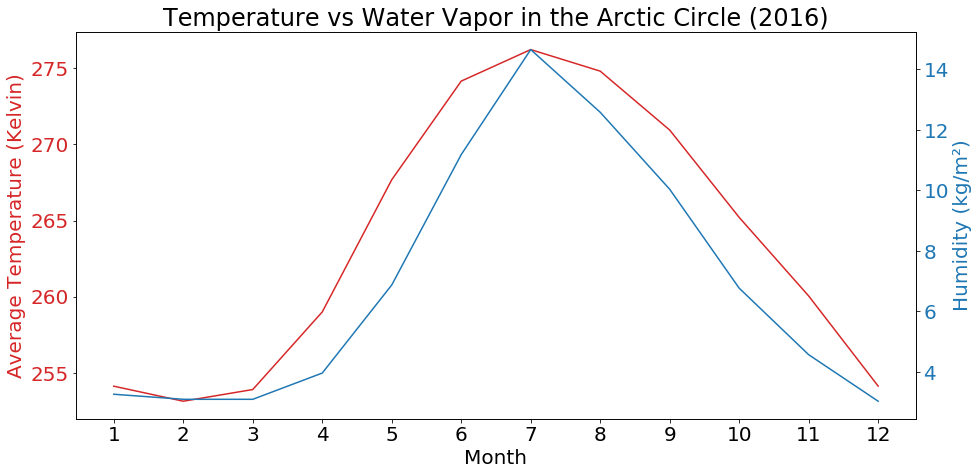

In [21]:
import numpy as np
import matplotlib.pyplot as plt

#creating 14 by 7 graph
fig, ax1 = plt.subplots(figsize=(14,7))

#x values (in this case months)
x = [1,2,3,4,5,6,7,8,9,10,11,12]

#y values for each month respectively (temperature data)
y = [janTemp16, febTemp16, marTemp16, aprTemp16, mayTemp16, junTemp16, julTemp16, 
     augTemp16, sepTemp16, octTemp16, novTemp16, decTemp16]

#y values for each month respectiely (water vapor data)
y2 = [janVapor16, febVapor16, marVapor16, aprVapor16, mayVapor16, junVapor16, julVapor16, 
     augVapor16, sepVapor16, octVapor16, novVapor16, decVapor16]

#plotting two graphs in one
#setting variable color to red to indicate the temperature portion of the graph
color = 'tab:red'
ax1.set_xlabel('Month')
ax1.set_ylabel('Average Temperature (Kelvin)', color = color)
ax1.plot(x, y, color = color)
ax1.tick_params(axis = 'y', labelcolor = color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Humidity (kg/m²)', color = color)
ax2.plot(x, y2, color = color)
ax2.tick_params(axis = 'y', labelcolor = color)

#line 34 is there to evenly spread out the months by 1
plt.xticks(np.arange(1,13, 1))
plt.title('Temperature vs Water Vapor in the Arctic Circle (2016)')


fig.tight_layout()
plt.show()

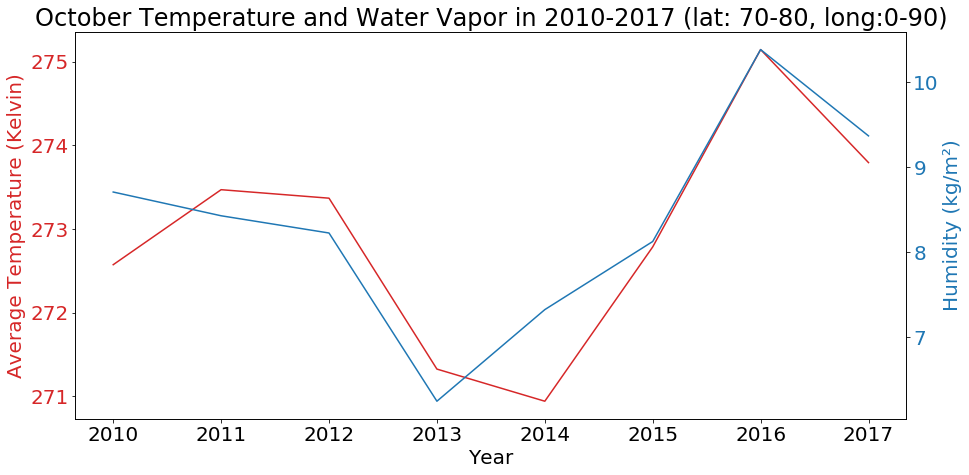

In [22]:
import numpy as np
import matplotlib.pyplot as plt

#LATITUDE = 70-80
#LONGITUDE = 0-90

fig, ax1 = plt.subplots(figsize=(14,7))

x = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]

y = [octTempYear10, octTempYear11, octTempYear12, octTempYear13, octTempYear14, octTempYear15, octTempYear16, octTempYear17]

y2 = [octVaporYear10, octVaporYear11, octVaporYear12, octVaporYear13, octVaporYear14, octVaporYear15, octVaporYear16, octVaporYear17]

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Temperature (Kelvin)', color = color)
ax1.plot(x, y, color = color)
ax1.tick_params(axis = 'y', labelcolor = color)


ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Humidity (kg/m²)', color = color)
ax2.plot(x, y2, color = color)
ax2.tick_params(axis = 'y', labelcolor = color)


plt.title('October Temperature and Water Vapor in 2010-2017 (lat: 70-80, long:0-90)')


fig.tight_layout()
plt.show()